In [5]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets.samples_generator import make_blobs   #data generator

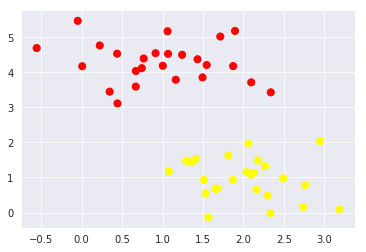

In [16]:
x,y=make_blobs(n_samples=50,centers=2,random_state=0,cluster_std=0.60)
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='autumn')
sns.set_style('darkgrid')

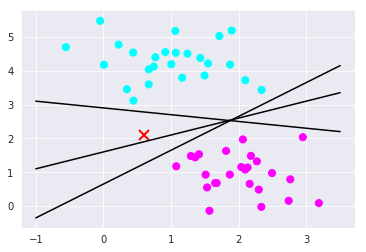

In [22]:
xfit=np.linspace(-1,3.5)
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='cool')
plt.plot([0.6],[2.1],'x',color='red',markeredgewidth=2,markersize=10)
for m,b in [(1,0.65),(0.5,1.6),(-0.2,2.9)]:
    plt.plot(xfit,m*xfit+b,'-k')

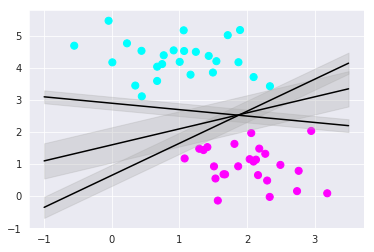

In [23]:
xfit=np.linspace(-1,3.5)
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='cool')
for m,b,d in [(1,0.65,0.33),(0.5,1.6,0.55),(-0.2,2.9,0.2)]:
    yfit=m*xfit+b
    plt.plot(xfit,yfit,'-k')
    plt.fill_between(xfit,yfit-d,yfit+d,edgecolor='none',color='#AAAAAA',alpha=0.3)
    

In [24]:
from sklearn.svm import SVC#support vector machine
model=SVC(kernel='linear',C=1E10)  #c for hard and soft margin by default 1
model.fit(x,y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [38]:
def plot_svc_decision_function(model,ax=None,plot_support=True):
    """plot the decision function for a 2d svc"""
    if ax is None:
        ax=plt.gca()
    xlim=ax.get_xlim()
    ylim=ax.get_ylim()
#create grid to evaluate model

    x=np.linspace(xlim[0],xlim[1],30)
    y=np.linspace(ylim[0],ylim[1],30)
    #meshgrid returns coordinate matrices from coordinate vectors
    #makes N-D coordinate array from vectorized  N-D scalar/vector
    y,x=np.meshgrid(y,x)
    #rowwise stack in sequence and transpose
    xy=np.vstack([x.ravel(),y.ravel()]).T
    #svc-decision function returns pairwise scores between classes-score for each class
    p=model.decision_function(xy).reshape(x.shape)
    
    #plot decision boundary and margins
    ax.contour(x,y,p,colors='k',levels=[-1,0,1],alpha=0.5,linestyles=['--','-','--'])
    #plot support vectors
    if plot_support:
        #model.support vectors-support vector coordinates
        ax.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1],s=50,linewidth=1,facecolors='black');
        ax.set_xlim(xlim)
        ax.set_ylim(ylim)
        
    
    
    
    

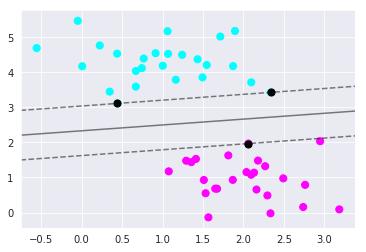

In [39]:
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='cool')
plot_svc_decision_function(model)

In [41]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

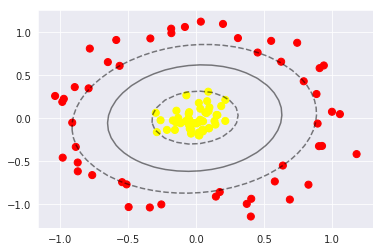

In [65]:
from sklearn.datasets.samples_generator import make_circles
x,y=make_circles(100,factor=.1,noise=.1)
clf=SVC(kernel='rbf',C=1E10)
clf.fit(x,y)
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='autumn')
plot_svc_decision_function(clf,plot_support=False)
plt.show()

In [66]:
#radial basis function centered on the middle clump
r=np.exp(-(x**2).sum(1))

In [67]:
from ipywidgets import interact,fixed
#interact 
from mpl_toolkits import mplot3d 
def plot_3D(elev=60,azim=30,x=x,y=y):
    ax=plt.subplot(projection='3d')
    ax.scatter3D(x[:,0],x[:,1],r,c=y,s=50,cmap='cool')
    ax.view_init(elev=elev,azim=azim)  #to draw 3d projection
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')
interact(plot_3D,elev=[0,90],azip=(-360,360),x=fixed(x),y=fixed(y))

interactive(children=(Dropdown(description='elev', options=(0, 90), value=0), IntSlider(value=30, description=…

<function __main__.plot_3D(elev=60, azim=30, x=array([[ 5.12725918e-02, -3.29087771e-02],
       [ 9.27264038e-01, -3.19300713e-01],
       [ 1.56760442e-01,  3.96263647e-02],
       [-3.73647183e-02, -1.76077957e-01],
       [ 9.04612137e-01, -3.21819939e-01],
       [-7.65186702e-01, -6.58371611e-01],
       [ 1.18179667e+00, -4.14249529e-01],
       [ 8.94719265e-01, -5.90864007e-02],
       [ 1.99442542e-02,  1.81182628e-01],
       [-1.83715890e-01,  1.04464454e+00],
       [ 5.52590947e-01,  9.02710553e-01],
       [-5.46598048e-02,  5.51267306e-02],
       [ 6.78607962e-02,  7.06439766e-02],
       [-1.03848467e+00,  2.61854631e-01],
       [-8.71411951e-01, -6.14594499e-01],
       [ 9.79028660e-02,  1.29062741e-01],
       [ 7.54408485e-02,  6.28762799e-02],
       [-9.85509915e-01,  1.92570581e-01],
       [-2.56192928e-01, -9.99683133e-01],
       [ 9.49600343e-02, -1.14428697e-01],
       [-1.82197354e-01,  9.92385674e-01],
       [-5.88201438e-01,  9.12932463e-01],
       